# **Internship on "Full Stack Data Science" at InfraBIM Techno Solutions Project -33.Gold Price Prediction (Android App Development Project**

# **Internship Reg. No.:1027**
# **Name:S.LAVAN KARTHIK**
# **Date:23/03/2023**

# **Problem Statement**

# The goal of “Gold price prediction” is to forecast gold's price using a variety of Machine learning techniques, considering the relationship between several economic factors that influence gold rates.

# **Tables of Content:**

# **1.IMPORTING LIBRARIRES**
# **2.LOADIND THE DATA SET**
# **3.EXPLORATORY DATA ANALYSIS(EDA)**
# **4.Train the data and Model Selection.** 
# **5.Create the Pickle File.** 


In [ ]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# **1.IMPORTING LIBRARIRES**

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# **2.LOADIND THE DATA SET**

In [3]:

df=pd.read_csv("https://datalabs-datasets.s3.ap-south-1.amazonaws.com/33_GoldPricePrediction.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# **3.EXPLORATORY DATA ANALYSIS(EDA)**

In [4]:
#Size of the 
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#checking the null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#statistical information
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#co-relation 
corr=df.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

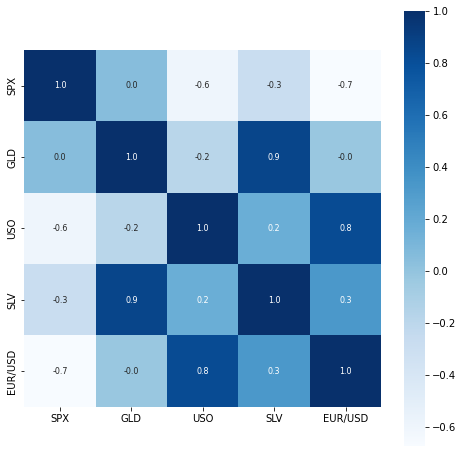

In [9]:
#heatmap for the correlation
plt.figure(figsize = (8,8))
sns.heatmap(corr,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-b59f4ac9eec4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

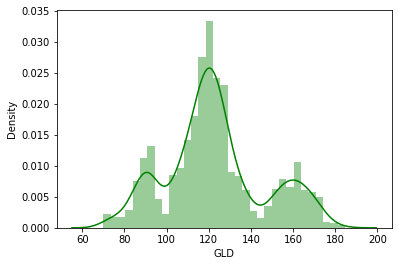

In [11]:
#plotting graph
sns.distplot(df['GLD'],color='green')

# **Independent and dependent Variables** 

In [12]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [13]:
x
#y

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


# **4.Train the data and Model Selection.** 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
rgr= RandomForestRegressor(n_estimators=100)
rgr.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
#predicting the values for the x_test)
rgr.predict(x_test)

array([168.56289922,  81.98499975, 116.0870998 , 127.65800089,
       120.72190111, 154.49869764, 150.42029825, 126.29070041,
       117.52329882, 126.08720051, 116.78500083, 171.69150083,
       141.12459798, 167.70609857, 115.02460027, 117.6523006 ,
       139.60030275, 170.1989008 , 159.59160286, 159.42429905,
       155.16969961, 125.27560014, 175.07010022, 157.22580386,
       125.09430079,  93.67249962,  77.55090019, 120.44980019,
       119.16379951, 167.49239986,  88.28310051, 125.31510003,
        91.14370083, 117.84370021, 121.10249908, 136.32420093,
       115.530201  , 115.14360067, 147.42889999, 107.28350093,
       104.31630254,  87.21829793, 126.56400007, 117.76950003,
       154.6385991 , 119.8996001 , 108.34269993, 107.97709816,
        93.19900034, 127.07899811,  74.5920004 , 113.60639918,
       121.31240009, 111.25159925, 118.79289883, 120.6101996 ,
       159.07790061, 169.5445012 , 147.19809676,  85.89499841,
        94.37160032,  86.83849876,  90.58660032, 119.05

In [19]:
#accuracy score
rgr.score(x_test,y_test)

0.9891908528154136

In [20]:
rgr.predict([[1447.160034,78.470001,15.1800,1.471692]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.03810017])

# **5.Create the Pickle File.** 

In [22]:
#import the model
import pickle
pickle.dump(rgr,open("rgr.pkl","wb"))

In [23]:
model = pickle.load(open("rgr.pkl","rb"))
model

RandomForestRegressor()

In [24]:
rgr.predict([[1447.160034,78.470001,15.1800,1.471692]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.03810017])